Wczytanie danych:

In [1]:
import pandas as pd
df = pd.read_csv("pgp_pointed-gun-at-person-details_pgpdetail.csv", delimiter=',', index_col='INC_IR_NO' )
df['INC_DATE'] = pd.to_datetime(df['INC_DATE'], format='%m/%d/%Y').dt.strftime('%d/%m/%Y')
df.head()

,INC_DATE,INC_YEAR,INC_TIME,INC_DAY_WEEK,INC_LOC_COUNTY,HUNDRED_BLOCK,INC_CITY,INC_STATE,INC_ZIPCODE,INC_PRECINCT,CIT_NUMBER,CIT_GENDER,CIT_AGE,SUBJ_AGE_GROUP,CIT_RACE,CIT_ETHNICITY,SIMPLE_SUBJ_RE_GRP,CITIZEN_CHARGE,PGP_COUNT
INC_IR_NO,,,,,,,,,,,,,,,,,,,
202000002064678,13/01/2020,2020,20:40,Monday,825 Beat,3XXX West Granada Road,Phoenix,AZ,85009,Maryvale/Estrella Precinct,24887.0,Male,21,20s,White,Hispanic,Hispanic,Criminal Felony,1
202000000483210,20/03/2020,2020,19:35,Friday,931 Beat,2XXX West Cactus Road,Phoenix,AZ,85029,Cactus Park Precinct,38867.0,Male,38,30s,White,Hispanic,Hispanic,Criminal Felony,1
202100000888204,08/06/2020,2020,10:37,Monday,223 Beat,1XXXX North 9th Avenue,Phoenix,AZ,85023,Black Mountain Precinct,33042.0,Male,40,40s,White,Non-Hispanic,White,Criminal Felony,1
202000001090896,01/07/2020,2020,06:30,Wednesday,815 Beat,1XXX 73rd Avenue N,Phoenix,AZ,85035,Maryvale/Estrella Precinct,21798.0,Male,27,20s,White,Hispanic,Hispanic,None,1
202000001090896,01/07/2020,2020,06:30,Wednesday,815 Beat,1XXX 73rd Avenue N,Phoenix,AZ,85035,Maryvale/Estrella Precinct,21793.0,Male,16,<20,Black,Non-Hispanic,Black or African American,None,1


Sprawdzenie brakujących wartości i naprawa błędów występujących w Data Frame:

In [2]:
df['CIT_RACE'] = df['CIT_RACE'].replace('Not Available', 'Unknown')
df['INC_CITY'] = df['INC_CITY'].str.title()
df['INC_CITY'] = df['INC_CITY'].replace(['Phx','Phoeix','Phoeniz','Phoenx','Pheonix','Phoenxi','Phoneix'], 'Phoenix')
df['CIT_AGE'] = df['CIT_AGE'].replace(['-1', '0', '121'], float('NaN'))
df['CIT_AGE'] = df['CIT_AGE'].replace('Not Available', float('NaN')).astype(float)
df['CIT_AGE'] = df['CIT_AGE'].astype(float)
df['CIT_AGE'].fillna(round(df['CIT_AGE'].mean(), 1), inplace=True)
df.head()

,INC_DATE,INC_YEAR,INC_TIME,INC_DAY_WEEK,INC_LOC_COUNTY,HUNDRED_BLOCK,INC_CITY,INC_STATE,INC_ZIPCODE,INC_PRECINCT,CIT_NUMBER,CIT_GENDER,CIT_AGE,SUBJ_AGE_GROUP,CIT_RACE,CIT_ETHNICITY,SIMPLE_SUBJ_RE_GRP,CITIZEN_CHARGE,PGP_COUNT
INC_IR_NO,,,,,,,,,,,,,,,,,,,
202000002064678,13/01/2020,2020,20:40,Monday,825 Beat,3XXX West Granada Road,Phoenix,AZ,85009,Maryvale/Estrella Precinct,24887.0,Male,21.0,20s,White,Hispanic,Hispanic,Criminal Felony,1
202000000483210,20/03/2020,2020,19:35,Friday,931 Beat,2XXX West Cactus Road,Phoenix,AZ,85029,Cactus Park Precinct,38867.0,Male,38.0,30s,White,Hispanic,Hispanic,Criminal Felony,1
202100000888204,08/06/2020,2020,10:37,Monday,223 Beat,1XXXX North 9th Avenue,Phoenix,AZ,85023,Black Mountain Precinct,33042.0,Male,40.0,40s,White,Non-Hispanic,White,Criminal Felony,1
202000001090896,01/07/2020,2020,06:30,Wednesday,815 Beat,1XXX 73rd Avenue N,Phoenix,AZ,85035,Maryvale/Estrella Precinct,21798.0,Male,27.0,20s,White,Hispanic,Hispanic,None,1
202000001090896,01/07/2020,2020,06:30,Wednesday,815 Beat,1XXX 73rd Avenue N,Phoenix,AZ,85035,Maryvale/Estrella Precinct,21793.0,Male,16.0,<20,Black,Non-Hispanic,Black or African American,None,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11612 entries, 202000002064678 to 202300000157115
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INC_DATE            11612 non-null  object 
 1   INC_YEAR            11612 non-null  int64  
 2   INC_TIME            11612 non-null  object 
 3   INC_DAY_WEEK        11612 non-null  object 
 4   INC_LOC_COUNTY      11612 non-null  object 
 5   HUNDRED_BLOCK       11612 non-null  object 
 6   INC_CITY            11612 non-null  object 
 7   INC_STATE           11612 non-null  object 
 8   INC_ZIPCODE         11612 non-null  object 
 9   INC_PRECINCT        11612 non-null  object 
 10  CIT_NUMBER          11608 non-null  float64
 11  CIT_GENDER          11612 non-null  object 
 12  CIT_AGE             11612 non-null  float64
 13  SUBJ_AGE_GROUP      11612 non-null  object 
 14  CIT_RACE            11612 non-null  object 
 15  CIT_ETHNICITY       11612 non-null

In [4]:
df['CIT_AGE'].describe()

count    11612.000000
mean        31.818378
std         11.805106
min          1.000000
25%         23.000000
50%         31.000000
75%         38.000000
max         91.000000
Name: CIT_AGE, dtype: float64

In [5]:
print(df['CIT_AGE'].unique())
obs_counts = df['CIT_AGE'].value_counts()
print(obs_counts)

[21.  38.  40.  27.  16.   1.   5.  31.  30.  33.  67.  13.  39.   8.
 28.  53.  23.  19.  37.  41.  47.  74.  48.  22.  32.  31.8 20.  18.
 65.  50.  24.  49.  25.  26.  17.  34.  45.  46.  76.  52.  43.  55.
 29.  57.  44.  35.  56.   4.   2.  12.  36.  72.  51.  60.  59.  42.
 61.  66.  79.  69.  58.  54.  63.   9.  15.  14.  64.  82.   7.   6.
 62.  71.   3.  68.  11.  70.  77.  91.  73.  75.  10.  81.  78.  83.
 80.  86. ]
27.0    440
31.0    435
28.0    428
29.0    396
32.0    393
       ... 
80.0      3
82.0      2
91.0      2
81.0      2
86.0      1
Name: CIT_AGE, Length: 86, dtype: int64


Wybór modelu:

Model: Random Forest
Średnie MSE: 0.66
Średnie MAE: 0.52
----------------------------------------
Model: Gradient Boosting
Średnie MSE: 0.82
Średnie MAE: 0.80
----------------------------------------
Model: Linear Regression
Średnie MSE: 0.57
Średnie MAE: 0.62
----------------------------------------
Błąd średniokwadratowy (MSE) na zbiorze testowym: 0.64
Błąd średniego bezwzględnego (MAE) na zbiorze testowym: 0.55
F1 miara: 0.53
Dokładność (Accuracy): 0.49
Precyzja (Precision): 0.84
Czułość (Recall): 0.49
Macierz pomyłek:


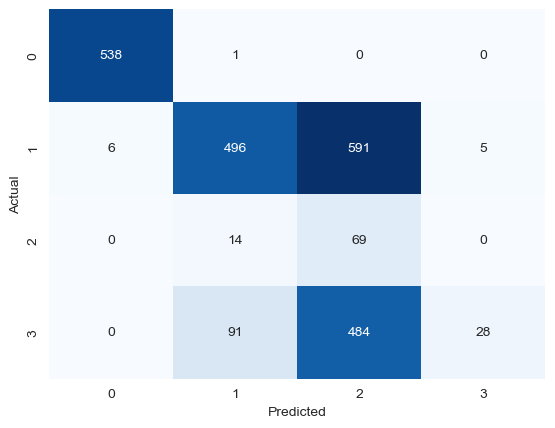

In [6]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ['INC_YEAR', 'CIT_AGE']

categorical_features = ['INC_DAY_WEEK', 'INC_LOC_COUNTY', 'INC_CITY', 'INC_ZIPCODE',
                        'INC_PRECINCT', 'CIT_GENDER', 'SUBJ_AGE_GROUP', 'CIT_RACE', 'CITIZEN_CHARGE']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

X = df[numeric_features + categorical_features]
y = df['SIMPLE_SUBJ_RE_GRP']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=1)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

models = [
    ('Random Forest', RandomForestRegressor(n_estimators=5, random_state=1)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=5, random_state=1)),
    ('Linear Regression', LinearRegression())
]

for model_name, model in models:
    mse_scores = -cross_val_score(model, X_train_preprocessed, y_train, cv=5, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, X_train_preprocessed, y_train, cv=5, scoring='neg_mean_absolute_error')

    mean_mse = mse_scores.mean()
    mean_mae = mae_scores.mean()

    print("Model: {}".format(model_name))
    print("Średnie MSE: {:.2f}".format(mean_mse))
    print("Średnie MAE: {:.2f}".format(mean_mae))
    print("----------------------------------------")

best_model = GradientBoostingRegressor(n_estimators=100, random_state=1)
best_model.fit(X_train_preprocessed, y_train)

y_pred = best_model.predict(X_test_preprocessed)
y_pred_rounded = np.round(y_pred)

mse = mean_squared_error(y_test, y_pred_rounded)
mae = mean_absolute_error(y_test, y_pred_rounded)
f1 = f1_score(y_test, y_pred_rounded, average='weighted')
accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded, average='weighted')
recall = recall_score(y_test, y_pred_rounded, average='weighted')
confusion = confusion_matrix(y_test, y_pred_rounded)

print("Błąd średniokwadratowy (MSE) na zbiorze testowym: {:.2f}".format(mse))
print("Błąd średniego bezwzględnego (MAE) na zbiorze testowym: {:.2f}".format(mae))
print("F1 miara: {:.2f}".format(f1))
print("Dokładność (Accuracy): {:.2f}".format(accuracy))
print("Precyzja (Precision): {:.2f}".format(precision))
print("Czułość (Recall): {:.2f}".format(recall))

cm = confusion_matrix(y_test, y_pred_rounded)

print("Macierz pomyłek:")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model: Random Forest
Średnie MSE: 0.65
Średnie MAE: 0.52
----------------------------------------
Model: Gradient Boosting
Średnie MSE: 0.82
Średnie MAE: 0.80
----------------------------------------
Model: Linear Regression
Średnie MSE: 0.56
Średnie MAE: 0.62
----------------------------------------
Błąd średniokwadratowy (MSE) na zbiorze testowym: 0.64
Błąd średniego bezwzględnego (MAE) na zbiorze testowym: 0.55
F1 miara: 0.53
Dokładność (Accuracy): 0.49
Precyzja (Precision): 0.84
Czułość (Recall): 0.49
Macierz pomyłek:


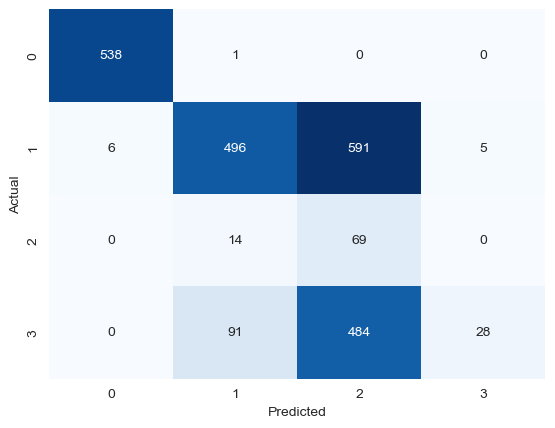

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ['INC_YEAR', 'CIT_AGE']

categorical_features = ['INC_DAY_WEEK', 'INC_LOC_COUNTY', 'INC_CITY', 'INC_ZIPCODE',
                        'INC_PRECINCT', 'CIT_GENDER', 'SUBJ_AGE_GROUP', 'CIT_RACE', 'CITIZEN_CHARGE']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

X = df[numeric_features + categorical_features]
y = df['SIMPLE_SUBJ_RE_GRP']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=1)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

models = [
    ('Random Forest', RandomForestRegressor(n_estimators=5, random_state=1)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=5, random_state=1)),
    ('Linear Regression', LinearRegression())
]

for model_name, model in models:
    mse_scores = -cross_val_score(model, X_train_preprocessed, y_train, cv=10, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, X_train_preprocessed, y_train, cv=10, scoring='neg_mean_absolute_error')

    mean_mse = mse_scores.mean()
    mean_mae = mae_scores.mean()

    print("Model: {}".format(model_name))
    print("Średnie MSE: {:.2f}".format(mean_mse))
    print("Średnie MAE: {:.2f}".format(mean_mae))
    print("----------------------------------------")

best_model = GradientBoostingRegressor(n_estimators=100, random_state=1)
best_model.fit(X_train_preprocessed, y_train)

y_pred = best_model.predict(X_test_preprocessed)
y_pred_rounded = np.round(y_pred)

mse = mean_squared_error(y_test, y_pred_rounded)
mae = mean_absolute_error(y_test, y_pred_rounded)
f1 = f1_score(y_test, y_pred_rounded, average='weighted')
accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded, average='weighted')
recall = recall_score(y_test, y_pred_rounded, average='weighted')

print("Błąd średniokwadratowy (MSE) na zbiorze testowym: {:.2f}".format(mse))
print("Błąd średniego bezwzględnego (MAE) na zbiorze testowym: {:.2f}".format(mae))
print("F1 miara: {:.2f}".format(f1))
print("Dokładność (Accuracy): {:.2f}".format(accuracy))
print("Precyzja (Precision): {:.2f}".format(precision))
print("Czułość (Recall): {:.2f}".format(recall))

cm = confusion_matrix(y_test, y_pred_rounded)

print("Macierz pomyłek:")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [8]:
missing_values_train = X_train.isnull().sum()
print("Brakujące wartości w zbiorze treningowym:")
print(missing_values_train)

missing_values_test = X_test.isnull().sum()
print("Brakujące wartości w zbiorze testowym:")
print(missing_values_test)

Brakujące wartości w zbiorze treningowym:
INC_YEAR          0
CIT_AGE           0
INC_DAY_WEEK      0
INC_LOC_COUNTY    0
INC_CITY          0
INC_ZIPCODE       0
INC_PRECINCT      0
CIT_GENDER        0
SUBJ_AGE_GROUP    0
CIT_RACE          0
CITIZEN_CHARGE    0
dtype: int64
Brakujące wartości w zbiorze testowym:
INC_YEAR          0
CIT_AGE           0
INC_DAY_WEEK      0
INC_LOC_COUNTY    0
INC_CITY          0
INC_ZIPCODE       0
INC_PRECINCT      0
CIT_GENDER        0
SUBJ_AGE_GROUP    0
CIT_RACE          0
CITIZEN_CHARGE    0
dtype: int64


Optymalizacja modelu:

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

model = GradientBoostingRegressor(random_state=1)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_preprocessed, y_train)

best_params = grid_search.best_params_
print("Najlepsze parametry: ", best_params)

best_model = GradientBoostingRegressor(**best_params)

best_model.fit(X_train_preprocessed, y_train)

y_pred = best_model.predict(X_test_preprocessed)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Błąd średniokwadratowy (MSE) na zbiorze testowym: {:.2f}".format(mse))
print("Błąd średniego bezwzględnego (MAE) na zbiorze testowym: {:.2f}".format(mae))

Najlepsze parametry:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Błąd średniokwadratowy (MSE) na zbiorze testowym: 0.53
Błąd średniego bezwzględnego (MAE) na zbiorze testowym: 0.55


Ważność atrybutów:

In [10]:
importance_scores = best_model.feature_importances_

categorical_transformer = preprocessor.named_transformers_['cat']
onehot_encoder = categorical_transformer
feature_names_cat = onehot_encoder.get_feature_names_out(categorical_features)

feature_names = numeric_features + list(feature_names_cat)

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importance_scores})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Ważności cech:")
print(feature_importances)

Ważności cech:
                                     Feature  Importance
268                           CIT_RACE_Black    0.727149
1                                    CIT_AGE    0.055939
246  INC_PRECINCT_Maryvale/Estrella Precinct    0.040032
251     INC_PRECINCT_South Mountain Precinct    0.024001
241     INC_PRECINCT_Black Mountain Precinct    0.015531
..                                       ...         ...
189                        INC_ZIPCODE_85225    0.000000
188                        INC_ZIPCODE_85224    0.000000
186                        INC_ZIPCODE_85212    0.000000
183                        INC_ZIPCODE_85208    0.000000
138                        INC_ZIPCODE_85011    0.000000

[277 rows x 2 columns]


In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Inicjalizacja aplikacji Dash
app = dash.Dash(__name__)

df = pd.read_csv('pgp_pointed-gun-at-person-details_pgpdetail.csv')

plotly_style = {
    'height': '400px',
    'margin': '10px'
}

app.layout = html.Div(
    style={
        'font-family': 'Arial, sans-serif',
        'max-width': '800px',
        'margin': 'auto',
        'padding': '20px'
    },
    children=[
        html.H1("Dashboard Projektu", style={'text-align': 'center'}),

        html.H2("Opis projektu"),
        html.P("Ten projekt ma na celu analizę danych związanych z przestępnościami w określonym regionie. Celem jest przewidzenie grupy przestępstw na podstawie dostępnych cech numerycznych i kategorycznych."),

        html.H2("Wizualizacja danych"),

        html.Div([
            html.Label('Typ wykresu:'),
            dcc.Dropdown(
                id='chart-type-selector',
                options=[
                    {'label': 'Wykres punktowy', 'value': 'scatter'},
                    {'label': 'Histogram', 'value': 'histogram'},
                    {'label': 'Wykres słupkowy', 'value': 'bar'}
                ],
                value='scatter',
                clearable=False,
                style={'width': '200px'}
            )
        ], style={'margin-bottom': '20px'}),

        html.Div([
            html.Label('Wybierz oś X:'),
            dcc.Dropdown(
                id='x-axis-selector',
                options=[{'label': col, 'value': col} for col in df.columns],
                value='CIT_AGE',
                clearable=False,
                style={'width': '200px'}
            )
        ], style={'margin-bottom': '20px'}),

        html.Div([
            html.Label('Wybierz oś Y:'),
            dcc.Dropdown(
                id='y-axis-selector',
                options=[{'label': col, 'value': col} for col in df.columns],
                value='PGP_COUNT',
                clearable=False,
                style={'width': '200px'}
            )
        ], style={'margin-bottom': '20px'}),

        html.Div(id='chart-container', style={'margin-bottom': '20px'})
    ]
)


@app.callback(
    Output('chart-container', 'children'),
    [Input('chart-type-selector', 'value'),
     Input('x-axis-selector', 'value'),
     Input('y-axis-selector', 'value')]
)
def update_chart(chart_type, x_axis, y_axis):
    if not x_axis or not y_axis:
        return html.Div('Wybierz oś X i oś Y, aby wyświetlić wykres.')

    if chart_type == 'scatter':
        fig = px.scatter(df, x=x_axis, y=y_axis, color='SIMPLE_SUBJ_RE_GRP')
    elif chart_type == 'histogram':
        fig = px.histogram(df, x=x_axis)
    elif chart_type == 'bar':
        fig = px.bar(df, x=x_axis, y=y_axis, color='SIMPLE_SUBJ_RE_GRP')
    else:
        fig = go.Figure()

    fig.update_layout(
        plotly_style,
        title=f'{chart_type.capitalize()}: {y_axis} vs {x_axis}',
        xaxis_title=x_axis,
        yaxis_title=y_axis
    )

    return dcc.Graph(figure=fig)


# Uruchomienie aplikacji Dash w Jupyter Notebook
app.run_server(mode='inline')

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


TypeError: run_simple() got an unexpected keyword argument 'mode'